# Análise descritiva

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Selecão dos dados
entrada = '/content/base alunos.xlsx'
data = pd.read_excel(entrada)

# Criação do DataFrame
df = pd.DataFrame(data)

# Criação da Estatística Descritiva
* Os dados foram organizados por Tipo de Escola;
* Para cada Tipo de Escola TipoEsc, as notas de teste Nota_Teste foram analisadas usando técnicas de estatística descritiva;
)
*As estatísticas calculadas para cada Tipo de Escola foram: média, desvio padrão, valor mínimo, valor máximo e mediana das notas de teste.*

In [9]:
stats = df.groupby('TipoEsc')['Nota_Teste'].agg(['mean', 'std', 'min', 'max', 'median'])
print("Estatísticas Descritivas:")
print(stats)

Estatísticas Descritivas:
             mean       std  min   max  median
TipoEsc                                       
priv     7.781250  1.361554  3.0  10.0     8.0
pub      4.694444  2.314525  1.5   9.0     4.5


# Demonstração de distribuição das notas por meio do Box Plot.
## Notas de Escolas Privadas (priv)

* Média e Mediana: A mediana (linha dentro da caixa) das respectivas notas de escolas privadas é identificada como mais alta em comparação com as escolas públicas. A mediana estar em torno de 8, conforme descrito.

* Dispersão: A caixa (que representa o intervalo interquartil) consideramos que é relativamente estreita, indicando que as notas são mais concentradas em torno da mediana. Isso sugere uma menor variabilidade nas notas.

* Outliers: Como demonstrado há um outlier abaixo da caixa (circulado), indicando que existe pelo menos um aluno com uma nota significativamente mais baixa em comparação com os demais.

## Notas de Escolas Públicas (pub)
* Média e Mediana: Como vemos a mediana das notas de escolas públicas é mais baixa do que a das escolas privadas, isso vemos em torno de 5.

* Dispersão: No tocante a ela, a caixa é mais larga, indicando maior variabilidade nas notas. Sugerindo que há uma maior diferença entre as notas altas e baixas entre os alunos das escolas públicas.


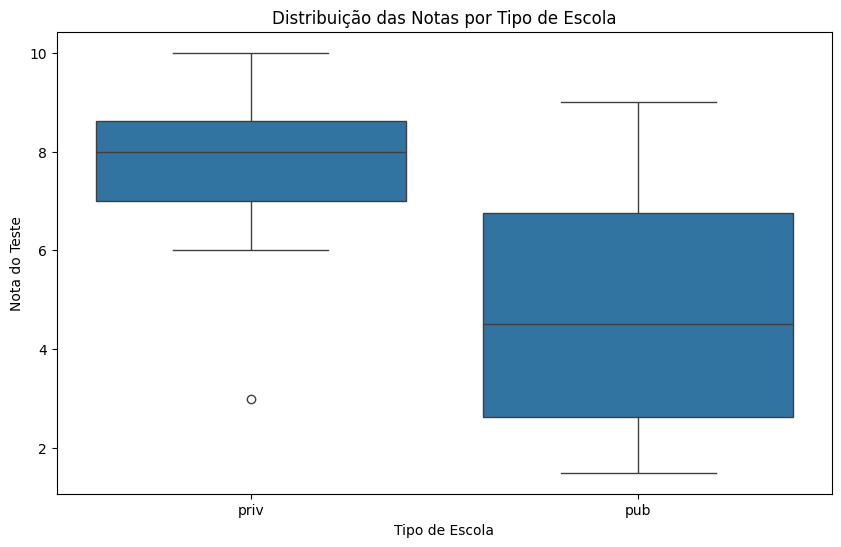

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TipoEsc', y='Nota_Teste', data=df)
plt.title('Distribuição das Notas por Tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota do Teste')
plt.show()

# Teste T

In [11]:
# Teste T
notas_priv = df[df['TipoEsc'] == 'priv']['Nota_Teste']
notas_pub = df[df['TipoEsc'] == 'pub']['Nota_Teste']
t_stat, p_value = ttest_ind(notas_priv, notas_pub, equal_var=False)

print(f'Estatística t: {t_stat}')
print(f'Valor p: {p_value}')

# Análise dos resultados
print("Análise Descritiva:")
print(stats)

print("Análise do Teste T:")
if p_value < 0.05:
    print("A diferença nas médias das notas entre escolas privadas e públicas é estatisticamente significativa (p < 0.05).")
else:
    print("A diferença nas médias das notas entre escolas privadas e públicas não é estatisticamente significativa (p >= 0.05).")


Estatística t: 5.176808801110816
Valor p: 2.73405134612497e-05
Análise Descritiva:
             mean       std  min   max  median
TipoEsc                                       
priv     7.781250  1.361554  3.0  10.0     8.0
pub      4.694444  2.314525  1.5   9.0     4.5
Análise do Teste T:
A diferença nas médias das notas entre escolas privadas e públicas é estatisticamente significativa (p < 0.05).
